<a href="https://colab.research.google.com/github/AhmedHTaalab/Slash-Project/blob/main/SlashTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 1: Exploratory Data Analysis (EDA)

## Data-Inspection

In [ ]:
import pandas as pd
import numpy as np

# Try with 'latin1' encoding
df = pd.read_csv('/content/drive/MyDrive/SlashTask/Amazon Sale Report.csv', encoding='latin1')
df.head()


<ipython-input-2-5cac0cf515b6>:5: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SlashTask/Amazon Sale Report.csv', encoding='latin1')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## Summary Statistics

In [ ]:
# Summary statistics for numerical variables
summary_statistics_numerical = df.describe()
print("Summary Statistics for Numerical Variables:")
print(summary_statistics_numerical)

# Summary statistics for categorical variables
summary_statistics_categorical = df.describe(include='object')
print("\nSummary Statistics for Categorical Variables:")
print(summary_statistics_categorical)


Summary Statistics for Numerical Variables:
               index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128940.000000
mean    64487.000000       0.904431     648.561465     463969.927594
std     37232.019822       0.313354     281.211687     191475.956294
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

Summary Statistics for Categorical Variables:
                   Order ID      Date   Status Fulfilment Sales Channel   \
count                128977    128977   128977     128977         128977   
unique               120379        92       14          4              3   
top     171-5057375-2831560  05-03-22  Shipped     Amazon   

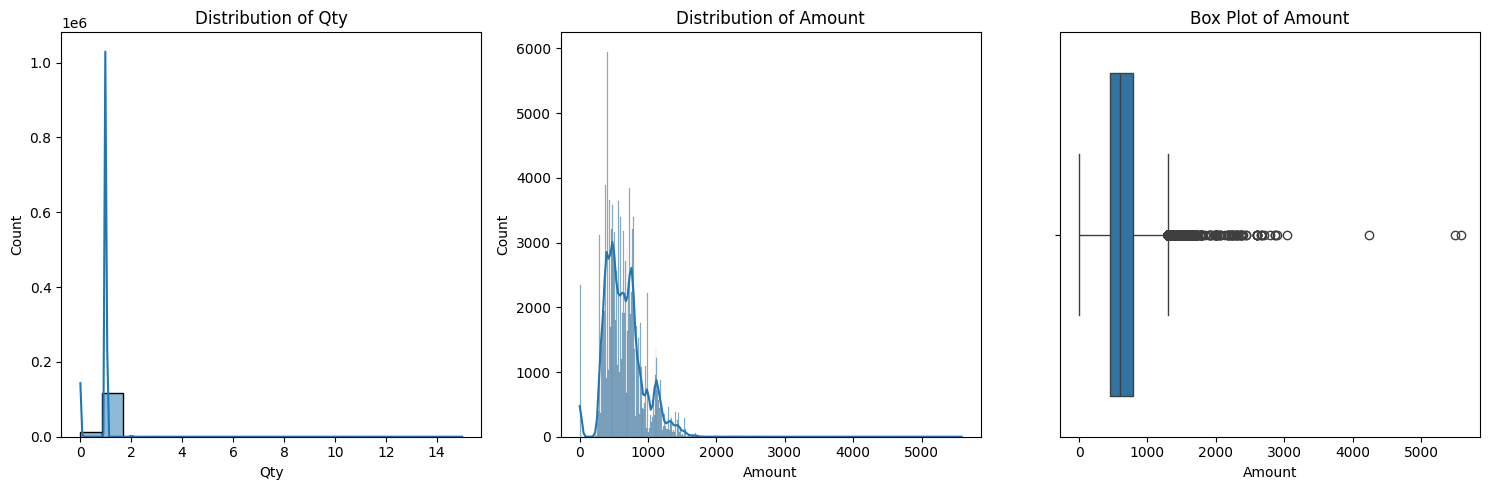

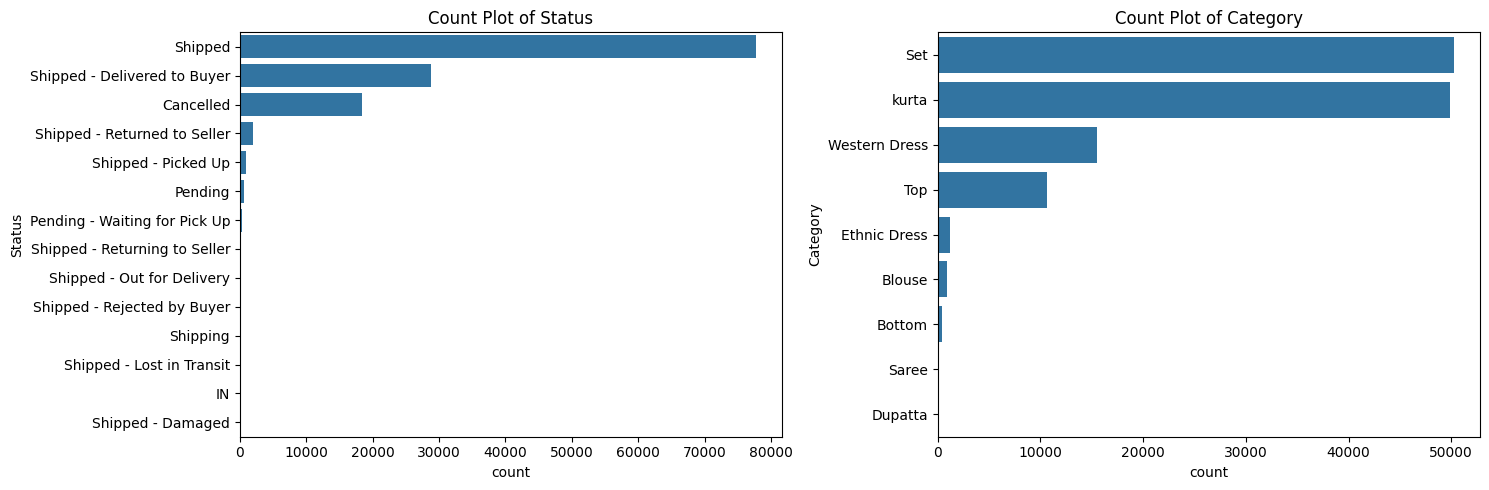

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numerical columns
plt.figure(figsize=(15, 5))

# Histogram for the 'Qty' column
plt.subplot(1, 3, 1)
sns.histplot(df['Qty'], kde=True)
plt.title('Distribution of Qty')

# Histogram for the 'Amount' column
plt.subplot(1, 3, 2)
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Amount')

# Box plot for the 'Amount' column
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Amount')

plt.tight_layout()
plt.show()

# Visualize distribution of categorical columns
plt.figure(figsize=(15, 5))

# Bar plot for the 'Status' column
plt.subplot(1, 2, 1)
sns.countplot(y=df['Status'], order=df['Status'].value_counts().index)
plt.title('Count Plot of Status')

# Bar plot for the 'Category' column
plt.subplot(1, 2, 2)
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title('Count Plot of Category')

plt.tight_layout()
plt.show()


#Step 2: Data Preprocessing

## 1. Handling Missing Values:



In [ ]:
np.round((df.isna().sum()/df.shape[0])*100)

index                  0.0
Order ID               0.0
Date                   0.0
Status                 0.0
Fulfilment             0.0
Sales Channel          0.0
ship-service-level     0.0
Style                  0.0
SKU                    0.0
Category               0.0
Size                   0.0
ASIN                   0.0
Courier Status         5.0
Qty                    0.0
currency               6.0
Amount                 6.0
ship-city              0.0
ship-state             0.0
ship-postal-code       0.0
ship-country           0.0
promotion-ids         38.0
B2B                    0.0
fulfilled-by          70.0
Unnamed: 22           38.0
dtype: float64

As fulfilled-by is 70%, promotions-ids is 38%, and unnamed:22 is 38% those exceeds 30% mark, i will drop them from the dataset.

In [ ]:
df.__delitem__('promotion-ids')
df.__delitem__('fulfilled-by')
df.__delitem__('Unnamed: 22')

In [ ]:
df.isna().sum()

index                    2
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      2
Category                 2
Size                     2
ASIN                     2
Courier Status        6874
Qty                      2
currency              7797
Amount                7797
ship-city               35
ship-state              37
ship-postal-code        37
ship-country            37
B2B                      4
dtype: int64

###Imputing Numerical

In [ ]:
df[df['index'].isna()].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
69618,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128256,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['Qty'].isna()].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
69618,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128256,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['Amount'].isna()].head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
8,8.0,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,B08L91ZZXN,Cancelled,0.0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False
29,29.0,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,B07JG3CND8,NaN,0.0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,False
65,65.0,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,...,B082W8RWN1,Cancelled,0.0,NaN,NaN,Dahod,Gujarat,389151.0,IN,False
84,84.0,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,B08WPR5MCB,Cancelled,0.0,NaN,NaN,HYDERABAD,TELANGANA,500072.0,IN,False
95,95.0,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,B081WSCKPQ,Cancelled,0.0,NaN,NaN,PUNE,MAHARASHTRA,411046.0,IN,False


In [ ]:
df[df['ship-postal-code'].isna()].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1871,1871.0,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,B099S6795L,Shipped,1.0,INR,493.0,NaN,NaN,NaN,NaN,False
1872,1872.0,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,B09811Y7WM,Shipped,1.0,INR,458.0,NaN,NaN,NaN,NaN,False
8752,8752.0,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,B082W7HW86,Shipped,1.0,INR,432.0,NaN,NaN,NaN,NaN,False
11215,11215.0,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,B0894X27FC,Shipped,1.0,INR,654.0,NaN,NaN,NaN,NaN,False
13252,13252.0,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,B081WX4G4Q,NaN,0.0,INR,380.0,NaN,NaN,NaN,NaN,False


In [ ]:
print(df['Qty'].median())
print(df['Amount'].median())

1.0
605.0


In [ ]:
df = df.fillna({
    'Qty': df['Qty'].median(),
})
df = df.fillna({
    'Amount': df['Amount'].median(),
})

In [ ]:
print(df[df['Qty'].isna()].head())
print(df[df['Amount'].isna()].head())

Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B]
Index: []

[0 rows x 21 columns]


In [ ]:
print(df['ship-postal-code'].mode()[0])
print(df['index'].mode()[0])

201301.0
0.0


In [ ]:
df = df.fillna({
    'ship-postal-code': df['ship-postal-code'].mode()[0],
})
df = df.fillna({
    'index': df['index'].mode()[0],
})


In [ ]:
print(df[df['ship-postal-code'].isna()].head())
print(df[df['index'].isna()].head())

Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B]
Index: []

[0 rows x 21 columns]


###Imputing Categorical

In [ ]:
print(df['SKU'].mode()[0])
print(df['Category'].mode()[0])
print(df['Size'].mode()[0])
print(df['ASIN'].mode()[0])
print(df['Courier Status'].mode()[0])
print(df['currency'].mode()[0])
print(df['ship-city'].mode()[0])
print(df['ship-state'].mode()[0])
print(df['ship-country'].mode()[0])
print(df['B2B'].mode()[0])

JNE3797-KR-L
Set
M
B09SDXFFQ1
Shipped
INR
BENGALURU
MAHARASHTRA
IN
False


In [ ]:
df = df.fillna({
    'SKU': df['SKU'].mode()[0],
})
df = df.fillna({
    'Category': df['Category'].mode()[0],
})
df = df.fillna({
    'Size': df['Size'].mode()[0],
})
df = df.fillna({
    'ASIN': df['ASIN'].mode()[0],
})
df = df.fillna({
    'Courier Status': df['Courier Status'].mode()[0],
})
df = df.fillna({
    'currency': df['currency'].mode()[0],
})
df = df.fillna({
    'ship-city': df['ship-city'].mode()[0],
})
df = df.fillna({
    'ship-state': df['ship-state'].mode()[0],
})
df = df.fillna({
    'ship-country': df['ship-country'].mode()[0],
})
df = df.fillna({
    'B2B': df['B2B'].mode()[0],
})

After Cleaning

In [ ]:
df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

##2. Data Type Conversion:

In [ ]:

df['index'] = df['index'].astype('int64')
df['Order ID'] = df['Order ID'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Status'] = df['Status'].astype('category')
df['Fulfilment'] = df['Fulfilment'].astype('category')
df['Sales Channel '] = df['Sales Channel '].astype('category')
df['ship-service-level'] = df['ship-service-level'].astype('category')
df['Style'] = df['Style'].astype('category')
df['SKU'] = df['SKU'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Size'] = df['Size'].astype('category')
df['ASIN'] = df['ASIN'].astype('category')
df['Courier Status'] = df['Courier Status'].astype('category')
df['Qty'] = df['Qty'].astype('float64')
df['currency'] = df['currency'].astype('category')
df['Amount'] = df['Amount'].astype('float64')
df['ship-city'] = df['ship-city'].astype('category')
df['ship-state'] = df['ship-state'].astype('category')
df['ship-postal-code'] = df['ship-postal-code'].astype(str)
df['ship-country'] = df['ship-country'].astype('category')
df['B2B'] = df['B2B'].astype('category')



# Verify the changes
print(df.dtypes)


<ipython-input-23-37f1b6cec421>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                      category
Fulfilment                  category
Sales Channel               category
ship-service-level          category
Style                       category
SKU                         category
Category                    category
Size                        category
ASIN                        category
Courier Status              category
Qty                          float64
currency                    category
Amount                       float64
ship-city                   category
ship-state                  category
ship-postal-code              object
ship-country                category
B2B                         category
dtype: object


##3.Outlier Detection and Treatment:

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in Qty and Amount columns
outliers_qty = detect_outliers_iqr(df, 'Qty')
outliers_amount = detect_outliers_iqr(df, 'Amount')

print("Outliers in Qty column:")
print(outliers_qty)

print("\nOutliers in Amount column:")
print(outliers_amount)


Outliers in Qty column:
         index             Order ID       Date     Status Fulfilment  \
0            0  405-8078784-5731545 2022-04-30  Cancelled   Merchant   
3            3  403-9615377-8133951 2022-04-30  Cancelled   Merchant   
8            8  407-5443024-5233168 2022-04-30  Cancelled     Amazon   
23          23  404-6019946-2909948 2022-04-30  Cancelled   Merchant   
29          29  404-5933402-8801952 2022-04-30  Cancelled   Merchant   
...        ...                  ...        ...        ...        ...   
128909  128907  403-6757403-6097100 2022-05-31  Cancelled     Amazon   
128910  128908  403-6757403-6097100 2022-05-31  Cancelled     Amazon   
128958  128956  403-0816822-3188305 2022-05-31    Shipped     Amazon   
128960  128958  408-9513596-4393945 2022-05-31  Cancelled     Amazon   
128969  128967  404-5182288-1653947 2022-05-31  Cancelled     Amazon   

       Sales Channel  ship-service-level    Style                  SKU  \
0           Amazon.in           Stand

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers in Qty and Amount columns
df_cleaned = remove_outliers_iqr(df, 'Qty')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Amount')

print("Data after removing outliers:")
print(df_cleaned)


Data after removing outliers:
         index             Order ID       Date                        Status  \
1            1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146 2022-04-30                       Shipped   
4            4  407-1069790-7240320 2022-04-30                       Shipped   
5            5  404-1490984-4578765 2022-04-30                       Shipped   
6            6  408-5748499-6859555 2022-04-30                       Shipped   
...        ...                  ...        ...                           ...   
128972  128970  406-6001380-7673107 2022-05-31                       Shipped   
128973  128971  402-9551604-7544318 2022-05-31                       Shipped   
128974  128972  407-9547469-3152358 2022-05-31                       Shipped   
128975  128973  402-6184140-0545956 2022-05-31                       Shipped   
128976  128974  408-7436540-8728312 2022-05-31                       Shipped   

       Fu

# Step 3: Data Visualization


##1.Using Matplotlib and Seaborn:

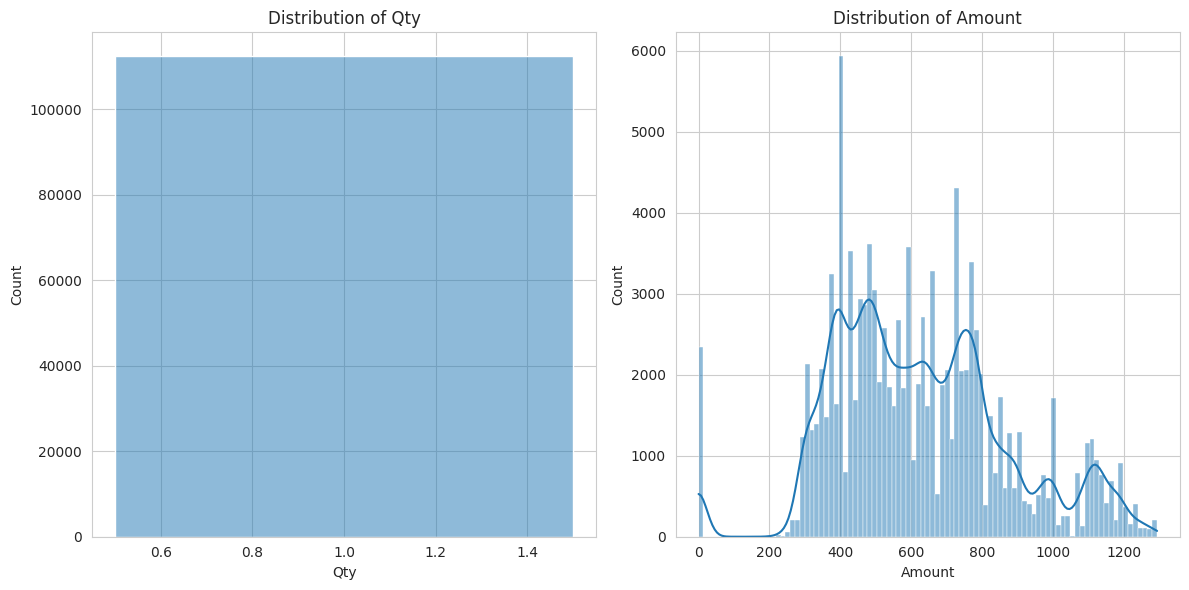

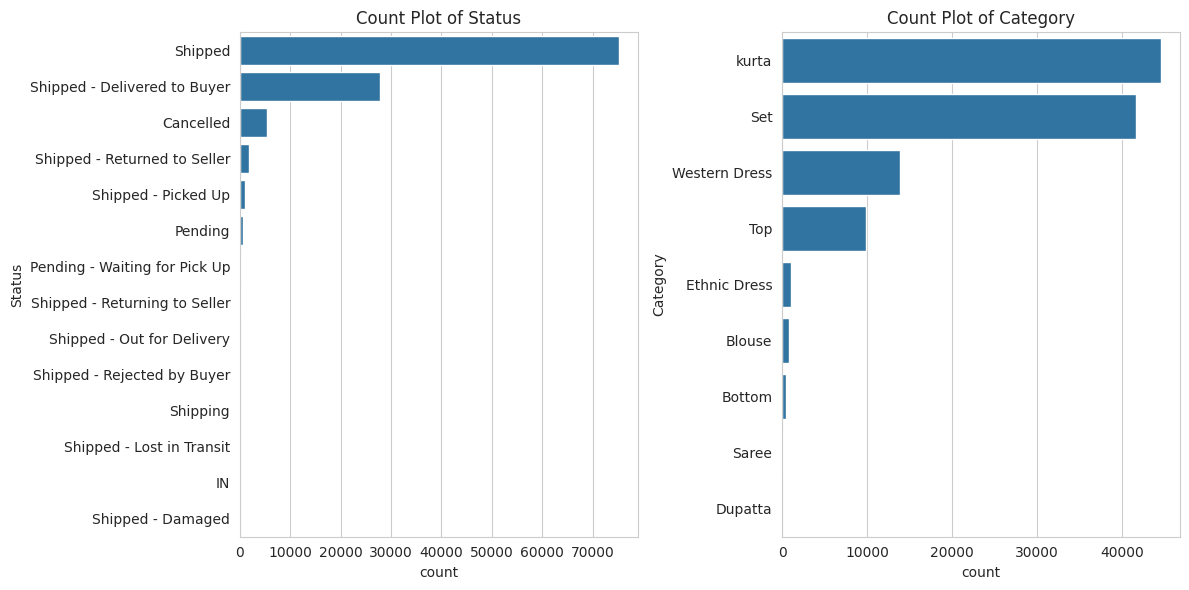

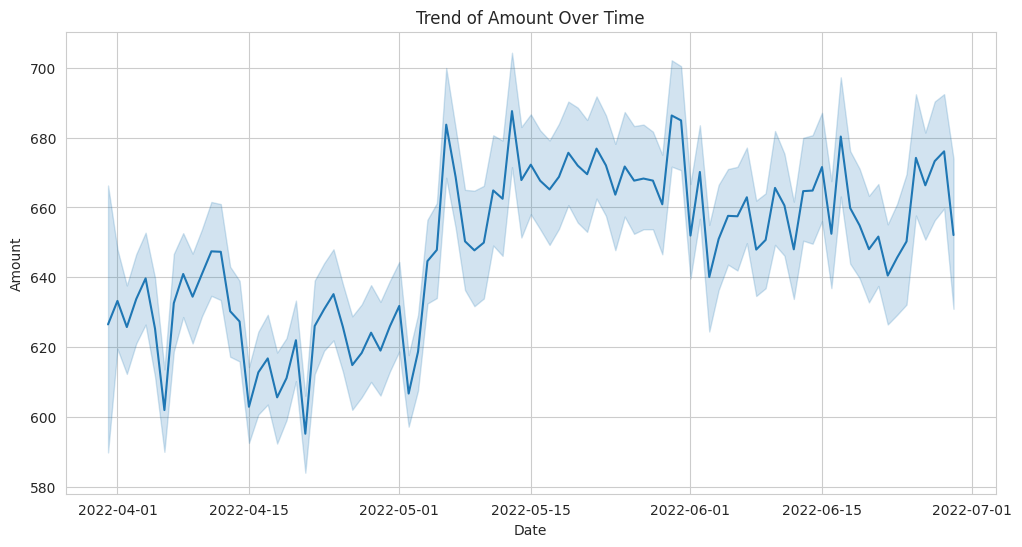

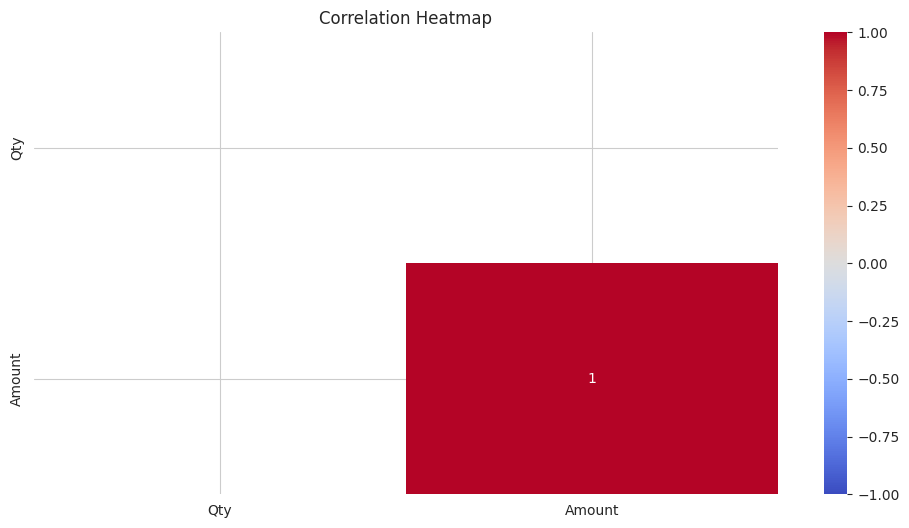

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Histograms for 'Qty' and 'Amount'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Qty'], kde=True)
plt.title('Distribution of Qty')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Amount'], kde=True)
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

# 2. Bar plots for 'Status' and 'Category'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(y=df_cleaned['Status'], order=df_cleaned['Status'].value_counts().index)
plt.title('Count Plot of Status')

plt.subplot(1, 2, 2)
sns.countplot(y=df_cleaned['Category'], order=df_cleaned['Category'].value_counts().index)
plt.title('Count Plot of Category')

plt.tight_layout()
plt.show()

# 3. Line plot for 'Date' vs. 'Amount'
plt.figure(figsize=(12, 6))
df.sort_values('Date', inplace=True)
sns.lineplot(data=df, x='Date', y='Amount')
plt.title('Trend of Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

# 4. Heatmap for correlations between numerical variables
plt.figure(figsize=(12, 6))
correlation_matrix = df_cleaned[['Qty', 'Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


##2.Visual Analysis:


<ipython-input-27-1b59d9f77b52>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')


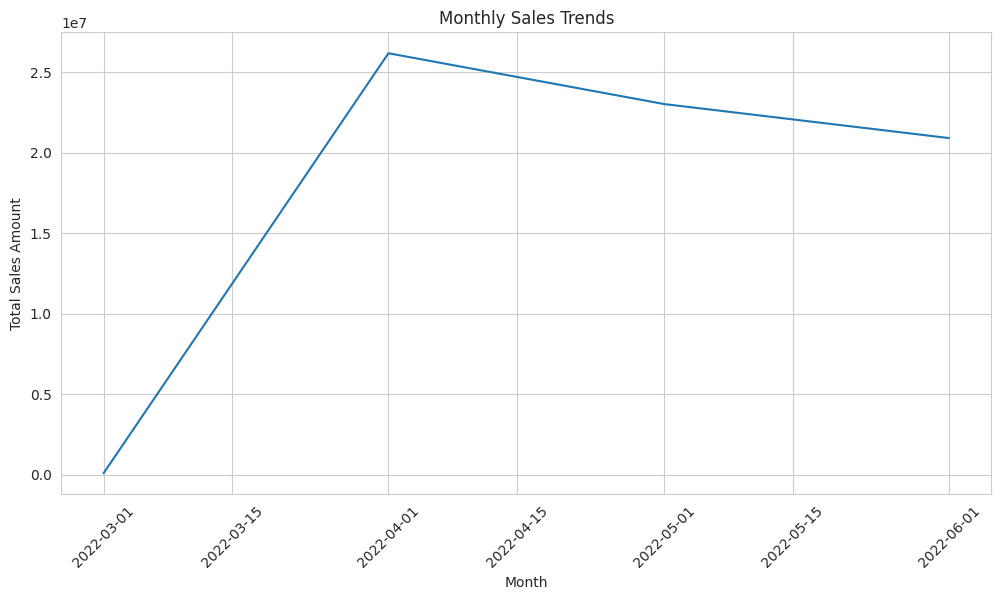

In [ ]:

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows with invalid dates
df_cleaned = df_cleaned.dropna(subset=['Date'])

# Extract month and year from the Date column
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')

# Group by Month and calculate total sales
monthly_sales = df_cleaned.groupby('Month')['Amount'].sum().reset_index()

# Convert 'Month' to datetime for proper plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()



<ipython-input-28-5fb98a823bb1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Amount', y='SKU', data=top_skus_data, palette='viridis')


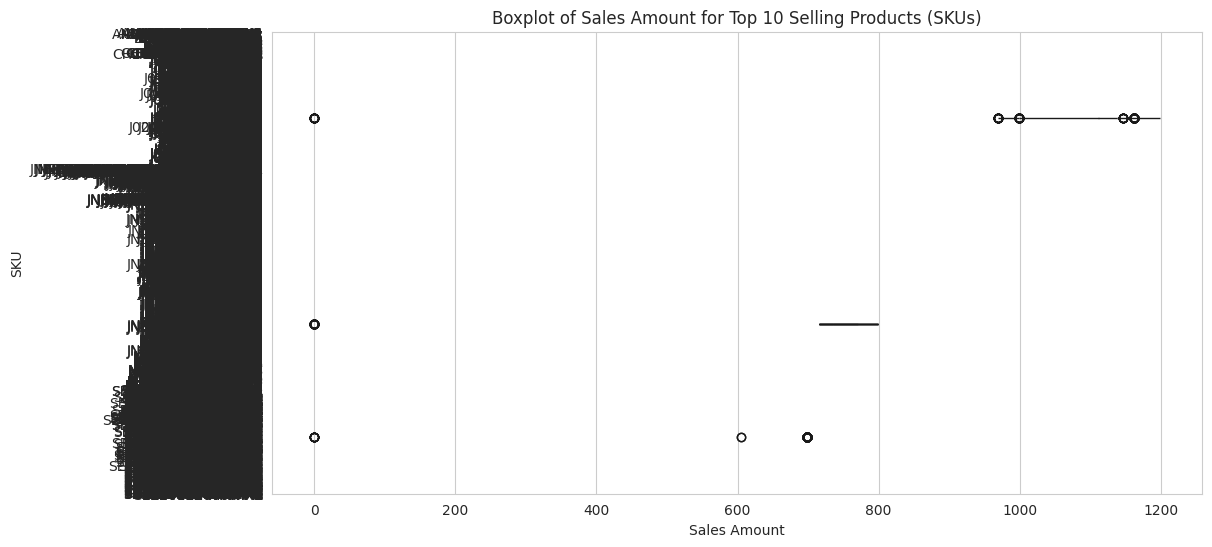

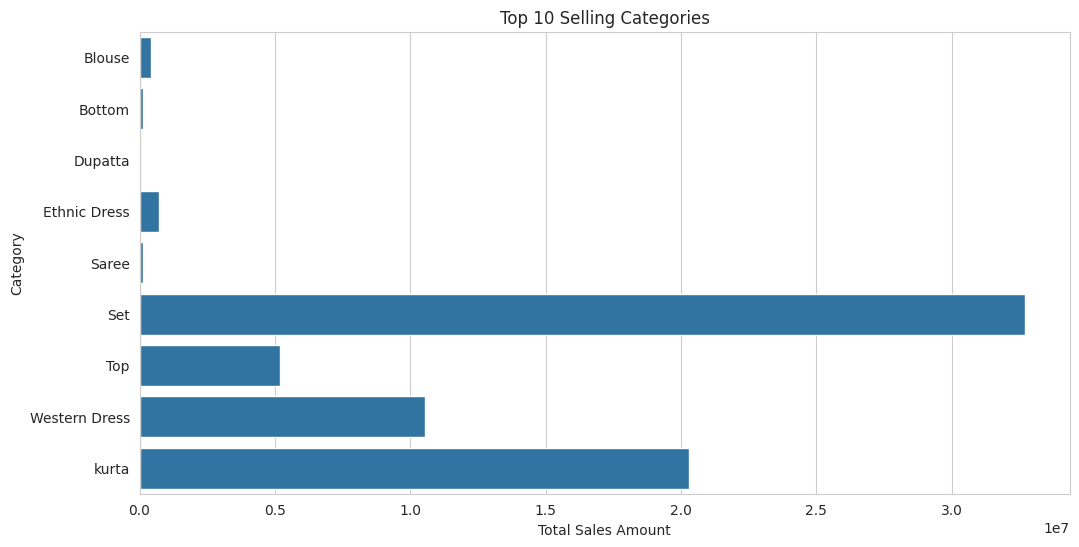

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales data to identify top-selling products
top_skus_sales = df_cleaned.groupby('SKU')['Amount'].sum().reset_index()

# Get the top 10 selling products based on total sales amount
top_skus = top_skus_sales.nlargest(10, 'Amount')

# Filter the original dataframe to include only the top 10 SKUs
top_skus_data = df_cleaned[df_cleaned['SKU'].isin(top_skus['SKU'])]

# Create a boxplot for the top-selling products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Amount', y='SKU', data=top_skus_data, palette='viridis')
plt.title('Boxplot of Sales Amount for Top 10 Selling Products (SKUs)')
plt.xlabel('Sales Amount')
plt.ylabel('SKU')
plt.show()



# Top-selling categories
top_categories = df_cleaned.groupby('Category')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='Amount', y='Category')
plt.title('Top 10 Selling Categories')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()


In [ ]:
import plotly.express as px

# Aggregate sales by country
country_sales = df.groupby('ship-country')['Amount'].sum().reset_index()

# Check for sufficient variation in sales amounts
print(country_sales)

# Create a choropleth map
fig = px.choropleth(country_sales,
                    locations='ship-country',
                    locationmode='country names',
                    color='Amount',
                    hover_name='ship-country',
                    color_continuous_scale='Viridis',
                    title='Sales Distribution by Country')

fig.update_geos(showcoastlines=True, coastlinecolor="Black",
                showland=True, landcolor="white",
                showocean=True, oceancolor="lightblue",
                showlakes=True, lakecolor="lightblue",
                showrivers=True, rivercolor="lightblue")

fig.show()



  ship-country      Amount
0           IN  83309863.3


In [ ]:
df.to_csv('newAmazonData.csv', index=False)

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
48970,48970,404-1445673-1345134,2022-03-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,...,B098121HFD,Shipped,1.0,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,False
49001,49001,406-7387241-2881923,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,...,B08B415N6S,Shipped,1.0,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,False
49002,49002,402-9332104-0945115,NaT,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,...,B081X2TYBM,Shipped,0.0,INR,416.19,GURGAON,HARYANA,122001.0,IN,False
49003,49003,408-1008226-2450750,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,B081WSCKPQ,Shipped,1.0,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,False
49004,49004,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,...,B07Q2P453R,Shipped,1.0,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,False


#Step-4 Predictive Modeling


##1. Building Predictive Models:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer

# Dropping unnecessary columns
columns_to_drop = ['index', 'Order ID', 'Date', 'ASIN', 'Month']
df_new = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


# Define the list of categorical columns
categorical_columns = [
    'Status', 'Fulfilment', 'ship-service-level',
    'Style', 'SKU', 'Category', 'Size', 'Courier Status',
    'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
    'currency', 'B2B'
]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Create a new DataFrame for the encoded columns
encoded_dataframe = pd.DataFrame()

# Apply LabelEncoder to categorical columns and insert into the new DataFrame
for column in categorical_columns:
    encoded_dataframe[column] = label_encoder.fit_transform(df_new[column])

print(encoded_dataframe.head())

# Define features X and target y
X = encoded_dataframe.drop(columns=['Status'])
y = encoded_dataframe['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate models
log_reg_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_log_reg),
    "precision": precision_score(y_test, y_pred_log_reg, average='weighted'),
    "recall": recall_score(y_test, y_pred_log_reg, average='weighted')
}

decision_tree_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_decision_tree),
    "precision": precision_score(y_test, y_pred_decision_tree, average='weighted'),
    "recall": recall_score(y_test, y_pred_decision_tree, average='weighted')
}

random_forest_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_random_forest),
    "precision": precision_score(y_test, y_pred_random_forest, average='weighted'),
    "recall": recall_score(y_test, y_pred_random_forest, average='weighted')
}

log_reg_metrics, decision_tree_metrics, random_forest_metrics


   Status  Fulfilment  ship-service-level  Style   SKU  Category  Size  \
0       6           3                   2    798  4098         8     5   
1       4           0                   1   1173  5923         5     8   
2       0           3                   2    538  2654         8     6   
3       4           0                   1    556  2746         8     5   
4       4           0                   1   1109  5621         5     5   

   Courier Status  ship-city  ship-state  ship-postal-code  ship-country  \
0               1       3713          61              7717             0   
1               1        777          23              4862             0   
2               1       2616          19               109             0   
3               1       5549          28              2534             0   
4               1       2907          57              3780             0   

   currency  B2B  
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-p

({'accuracy': 0.643743216002481,
  'precision': 0.5554663384975111,
  'recall': 0.643743216002481},
 {'accuracy': 0.8661032718250892,
  'precision': 0.8711904369617275,
  'recall': 0.8661032718250892},
 {'accuracy': 0.9092882617460072,
  'precision': 0.8992918711358695,
  'recall': 0.9092882617460072})

## Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Ensure you use stratified cross-validation
cv = StratifiedKFold(n_splits=5)

# Logistic Regression Cross-Validation with scaling and increased max_iter
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_reg_cv = cross_val_score(log_reg, X, y, cv=cv, scoring='accuracy')

# Decision Tree Cross-Validation with scaling
decision_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())
decision_tree_cv = cross_val_score(decision_tree, X, y, cv=cv, scoring='accuracy')

# Random Forest Cross-Validation with scaling
random_forest = make_pipeline(StandardScaler(), RandomForestClassifier())
random_forest_cv = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')

log_reg_cv.mean(), decision_tree_cv.mean(), random_forest_cv.mean()



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



(0.8284035150052791, 0.8622700292280905, 0.9061615599888801)

#Step 5: Dashboard Development


 ## Dashboard Design:

In [ ]:
!pip install dash pandas plotly matplotlib seaborn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.8 MB/s eta 0:00:00


In [49]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64

# Matplotlib visualization
def create_matplotlib_fig(filtered_df):
    fig, ax = plt.subplots()
    filtered_df['Amount'].hist(ax=ax, bins=20)
    ax.set_title('Distribution of Amounts')

    buffer = io.BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    return img_base64

# Seaborn visualization
def create_seaborn_fig(filtered_df):
    fig, ax = plt.subplots()
    sns.countplot(data=filtered_df, x='Status', ax=ax)
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    return img_base64

# Initialize Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Sales Dashboard'),

    # Dropdowns for interactivity
    html.Div([
        dcc.Dropdown(
            id='category-filter',
            options=[{'label': category, 'value': category} for category in df['Category'].unique()],
            value=[df['Category'].unique()[0]],
            multi=True,
            placeholder="Select Categories"
        ),
        dcc.Dropdown(
            id='status-filter',
            options=[{'label': status, 'value': status} for status in df['Status'].unique()],
            value=[df['Status'].unique()[0]],
            multi=True,
            placeholder="Select Statuses"
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Display Plotly visualizations
    dcc.Graph(id='sales-trend'),
    dcc.Graph(id='qty-distribution'),
    dcc.Graph(id='sales-by-country'),
    dcc.Graph(id='fulfilment-method-distribution'),
    dcc.Graph(id='sales-channel-distribution'),

    # Display Matplotlib visualization
    html.Img(id='matplotlib-img'),

    # Display Seaborn visualization
    html.Img(id='seaborn-img'),

    # Link to access the dashboard
    html.A('Access the Dashboard', href='http://127.0.0.1:8050/', target='_blank', style={'fontSize': '20px', 'marginTop': '20px', 'display': 'block'})
])

@app.callback(
    [Output('sales-trend', 'figure'),
     Output('qty-distribution', 'figure'),
     Output('sales-by-country', 'figure'),
     Output('fulfilment-method-distribution', 'figure'),
     Output('sales-channel-distribution', 'figure'),
     Output('matplotlib-img', 'src'),
     Output('seaborn-img', 'src')],
    [Input('category-filter', 'value'),
     Input('status-filter', 'value')]
)
def update_graphs(selected_categories, selected_statuses):
    filtered_df = df[df['Category'].isin(selected_categories) & df['Status'].isin(selected_statuses)]

    # Sales trend over time
    sales_trend_fig = px.line(filtered_df, x='Date', y='Amount', color='Status', title='Sales Trend Over Time')

    # Quantity distribution across categories
    qty_distribution_fig = px.histogram(filtered_df, x='Category', y='Qty', color='Category', title='Quantity Distribution Across Categories')

    # Sales by country
    sales_by_country_fig = px.bar(filtered_df, x='ship-country', y='Amount', color='ship-country', title='Sales by Country')

    # Fulfilment method distribution
    fulfilment_method_fig = px.pie(filtered_df, names='Fulfilment', title='Fulfilment Method Distribution')

    # Sales channel distribution
    sales_channel_fig = px.pie(filtered_df, names='Sales Channel', title='Sales Channel Distribution')

    # Matplotlib visualization
    matplotlib_img = 'data:image/png;base64,{}'.format(create_matplotlib_fig(filtered_df))

    # Seaborn visualization
    seaborn_img = 'data:image/png;base64,{}'.format(create_seaborn_fig(filtered_df))

    return sales_trend_fig, qty_distribution_fig, sales_by_country_fig, fulfilment_method_fig, sales_channel_fig, matplotlib_img, seaborn_img

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>